## Initial Data Exploration PPR Hydration Stations
Access to clean and purified water has long been an indicator of access internationally and locally. Water accessibility should not be taken for granted, and often is -- that is why it is important to understand where free hydration stations are located in reference to other accessibility factors in order to understand equality in Philadelphia. 

 ### Locations of hydration station and water fountains on or near Philadelphia Parks and Recreation (PPR) assets.
     
 * https://www.opendataphilly.org/dataset/ppr-hydration-stations
###### Locations of hydration station and water fountains on or near Philadelphia Parks and Recreation (PPR) assets. 
"It's important to provide clean, free drinking water in multiple areas by way of hydration stations. Although someone may not automatically feel dehydrated, it happens more frequently than you'd think and can easily zap energy and reduce the ability to focus or do well in school, at work, or during leisure time." 
https://www.drinkflowater.com/blog/the-importance-of-hydration-stations-for-schools/

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
hs_gdf = gpd.read_file('../data/PPR_Hydration_Stations.geojson')

In [3]:
hs_gdf.shape

(135, 10)

There are 135 rows and 10 columns

In [6]:
hs_gdf.head()

,OBJECTID,AMENITY_NAME,PARK_NAME,DISPLAY_LABEL,STATION_TYPE,LOCATION,DISPLAY_TYPE,COMMENTS,DATA_SOURCE,geometry
0,1,Verree Road Picnic Area Restrooms,Pennypack Park,None,FOUNTAIN,OUTDOOR,ALL,None,PPR Assets 2019; Initial Trails Web App,POINT (-75.06165 40.08735)
1,2,Lawncrest Recreation Center,Lawncrest Recreation Center,None,FOUNTAIN,INDOOR,ALL,None,Initial Trails Web App,POINT (-75.10110 40.04550)
2,3,Franklin Delano Roosevelt Recreation Center,Franklin Delano Roosevelt Playground,Roosevelt,HYDRATION,INDOOR,ALL,Installed 4/2019,Hydrate Philly Project,POINT (-75.05358 40.02626)
3,4,Lardners Point Park,Lardners Point Park,None,FOUNTAIN,OUTDOOR,ALL,None,"Initial Trails Web App, Pictometry 2020",POINT (-75.04643 40.01476)
4,5,Feltonville Recreation Center,Feltonville Recreation Center,Feltonville,HYDRATION,INDOOR,ALL,None,Hydrate Philly Project,POINT (-75.12114 40.02142)


In [10]:
hs_gdf['geometry']

0      POINT (-75.06165 40.08735)
1      POINT (-75.10110 40.04550)
2      POINT (-75.05358 40.02626)
3      POINT (-75.04643 40.01476)
4      POINT (-75.12114 40.02142)
                  ...            
130    POINT (-75.21462 39.99213)
131    POINT (-75.19649 39.97127)
132    POINT (-75.19758 39.97266)
133    POINT (-75.22177 39.98389)
134    POINT (-75.22226 39.98339)
Name: geometry, Length: 135, dtype: geometry

In [12]:
hs_gdf['LOCATION']

0      OUTDOOR
1       INDOOR
2       INDOOR
3      OUTDOOR
4       INDOOR
        ...   
130    OUTDOOR
131    OUTDOOR
132    OUTDOOR
133    OUTDOOR
134    OUTDOOR
Name: LOCATION, Length: 135, dtype: object

It was important for me to understand the difference in location between indoor and outdoor hydration stations as Philadelphia experiences seasons, and outdoor hydration stations may be more difficult to use in the winter when it is snowing or cold outside.

<AxesSubplot:>

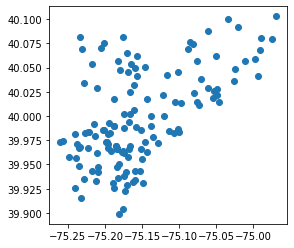

In [23]:
hs_gdf.plot()

<AxesSubplot:>

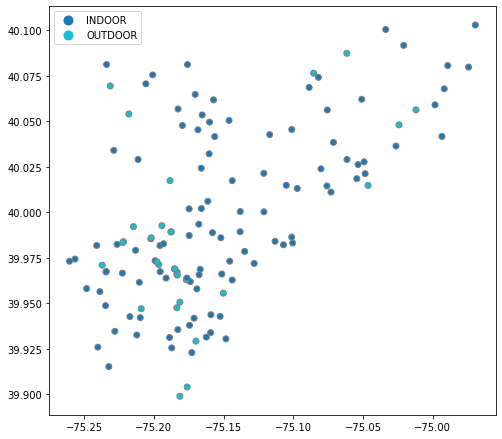

In [24]:
hs_gdf.plot(figsize=(8,8), edgecolor='gray', column='LOCATION', legend=True)

The plots above are difficult to read and analyze because we do not know where these hydration stations are located in reference to other inaccessibility factors and to the city of Philadelphia.

In [18]:
base_zip_gdf = gpd.read_file('../data/Zipcodes_Poly.geojson')
base_ward_gdf = gpd.read_file('../data/Political_Divisions.geojson')

By loading a base-map of Philadelphia and the blocks within, it is much easier to understand the locations of these hydration stations in context and conversation with the shape and dimensions of the city I am studying.

<AxesSubplot:>

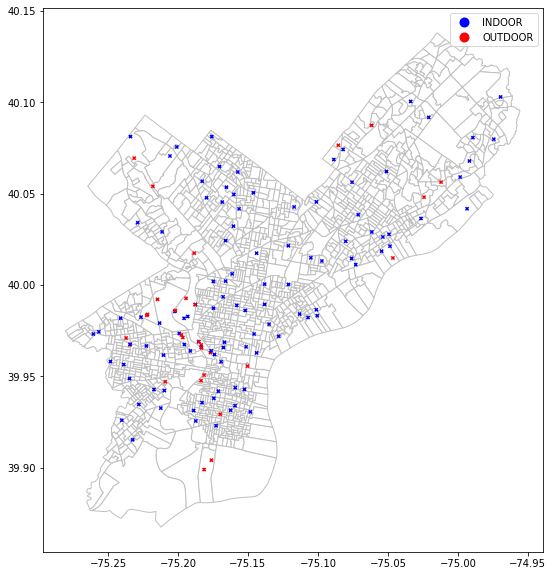

In [25]:
base=base_ward_gdf.plot(color='white', edgecolor='#c0c0c0', figsize=(10,10))
hs_gdf.plot(ax=base, edgecolor='gray', 
            column='LOCATION',
            categorical=True,
            legend=True, cmap='bwr', marker='x', markersize=10)

I chose to plot the Public Hydration Stations by indoor and outdoor denoted by blue and red respectively, and all the "X's" are the locations of these public stations.

The only pattern I noticed is that the outdoor stations were located in parks, which is not surprising, and other than there being more Hydration Stations close together clustered near Center City the stations seem to be evenly dispersed around the city of Philadelphia.
* Public Hydration Stations
> The Public Hydration Stations are very evenly scattered across the city of Philadelphia with less outdoor Hydration Stations, which makes sense as those would only be located in parks or public recreational locations. Philadelphia has done an amazing job at making sure there is very little inequality in the ability to access clean  fresh water.